<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Statistical Treatment for Datasets</font></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from six import StringIO
from sklearn import tree
import pydotplus
from time import time
from IPython.display import Image
import seaborn as sns

# <font color="steelblue">01. Data Preparation

<font color="mediumpurple"> Load the dataset

In [2]:
bank_add_full = pd.read_csv("dataset/bank-additional-full.csv", sep=";")
bank_add_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank_add = pd.read_csv("dataset/bank-additional.csv", sep=";")
bank_add

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
bank_full = pd.read_csv("dataset/bank-full.csv", sep=";")
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank = pd.read_csv("dataset/bank.csv", sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# <font color="steelblue">02. Logistic Regression

In [8]:
# Create x as features and y as target
x = bank_add_full.drop(["y"], axis=1)
y = bank_add_full["y"]

RANDOM_STATE = 999

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

In [9]:
# Select column names by data type
numeric_features = x.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x.select_dtypes(include=["object"]).columns

# Numerical column transformer
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical column transformer
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full column transformer
preprocess = ColumnTransformer([
    ('numerical', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features),
])

In [10]:
# Full model pipeline
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('filter', VarianceThreshold()),
    ('model', LogisticRegression(random_state=RANDOM_STATE))
])

# Model fitting (this process include fitting the preprocess component)
model.fit(x_train, y_train)

/Users/septyaprilliandary/opt/anaconda3/envs/hacktiv8-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('filter', VarianceThreshold()),
                ('mo

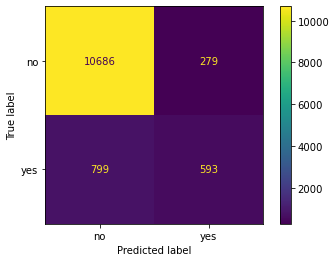

In [11]:
# Visualize confusion matrix
plot_confusion_matrix(model, x_test, y_test)

In [12]:
# Show classification report
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10965
         yes       0.68      0.43      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.81      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



# <font color="steelblue">03. Random Forest

In [13]:
# Fit a random forest model using existing flow
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('filter', VarianceThreshold()),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE))
])

model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('filter', VarianceThreshold()),
                ('mo

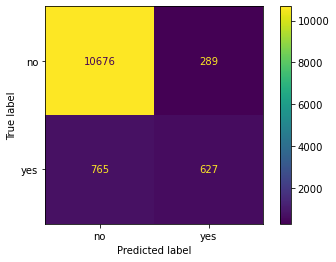

In [14]:
# Display confusion matrix
plot_confusion_matrix(model, x_test, y_test)

In [15]:
# Display evaluation metrics
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10965
         yes       0.68      0.45      0.54      1392

    accuracy                           0.91     12357
   macro avg       0.81      0.71      0.75     12357
weighted avg       0.91      0.91      0.91     12357



# <font color="steelblue">04. K-Nearest Neighbors

In [16]:
# See the content of object features
bank_add_full["job"].value_counts()
bank_add_full["marital"].value_counts()
bank_add_full["education"].value_counts()
bank_add_full["default"].value_counts()
bank_add_full["housing"].value_counts()
bank_add_full["loan"].value_counts()
bank_add_full["contact"].value_counts()
bank_add_full["month"].value_counts()
bank_add_full["day_of_week"].value_counts()
bank_add_full["poutcome"].value_counts()
bank_add_full["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [17]:
# Convert object features into numeric
bank_add_full["job_label"] = bank_add_full["job"].replace({"admin.": 0, "blue-collar": 1, "technician": 2, "services": 3, "management": 4, "retired": 5, "entrepreneur": 6, "self-employed": 7, "housemaid": 8, "unemployed": 9, "student": 10, "unknown": 99})
bank_add_full["mar_label"] = bank_add_full["marital"].replace({"married": 0, "single": 1, "divorced": 2, "unknown": 99})
bank_add_full["edu_label"] = bank_add_full["education"].replace({"university.degree": 0, "high.school": 1, "basic.9y": 2, "professional.course": 3, "basic.4y": 4, "basic.6y": 5, "illiterate": 6, "unknown": 99})
bank_add_full["def_label"] = bank_add_full["default"].replace({"no": 0, "yes": 1, "unknown": 99})
bank_add_full["hou_label"] = bank_add_full["housing"].replace({"no": 0, "yes": 1, "unknown": 99})
bank_add_full["loan_label"] = bank_add_full["loan"].replace({"no": 0, "yes": 1, "unknown": 99})
bank_add_full["contact_label"] = bank_add_full["contact"].replace({"cellular": 0, "telephone": 1})
bank_add_full["month_label"] = bank_add_full["month"].replace({"mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})
bank_add_full["day_label"] = bank_add_full["day_of_week"].replace({"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5})
bank_add_full["y_label"] = bank_add_full["y"].replace({"no": 0, "yes": 1})

bank_add_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_label,mar_label,edu_label,def_label,hou_label,loan_label,contact_label,month_label,day_label,y_label
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,8,0,4,0,0,0,1,5,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,3,0,1,99,0,0,1,5,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,3,0,1,0,1,0,1,5,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,5,0,0,0,1,5,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,3,0,1,0,0,1,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,5,0,3,0,1,0,0,11,5,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,3,0,0,0,0,11,5,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,5,0,0,0,1,0,0,11,5,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,2,0,3,0,0,0,0,11,5,1


In [18]:
# Create x as features and y as target
x = bank_add_full.drop(["y", "y_label", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"], axis=1)
y = bank_add_full["y"]

RANDOM_STATE = 999

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

In [19]:
# Define kNN model
knn = KNeighborsClassifier(n_neighbors=7)

# Train kNN -> store data and label
knn.fit(x_train, y_train)

# Predict
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

# Classification report
print("Training performance:",
     classification_report(y_train, train_pred), sep="\n")

print("Testing performance:",
     classification_report(y_test, test_pred), sep="\n")

Training performance:
              precision    recall  f1-score   support

          no       0.95      0.97      0.96     25583
         yes       0.71      0.57      0.63      3248

    accuracy                           0.92     28831
   macro avg       0.83      0.77      0.79     28831
weighted avg       0.92      0.92      0.92     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10965
         yes       0.63      0.48      0.54      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [20]:
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    error.append(np.mean(prediction != y_test))
    
print(error)

[0.11086833373796229, 0.10196649672250546, 0.0991340940357692, 0.09678724609533058, 0.09298373391599903, 0.0916889212592053, 0.09087966334870923, 0.09185077284130452, 0.09176984705025491, 0.09015133122926276, 0.0894229991098163, 0.08820911224407219, 0.08699522537832807, 0.08691429958727846, 0.08748078012462572, 0.08796633487092337, 0.08756170591567533, 0.08812818645302258, 0.08683337379622885, 0.08667152221412965, 0.08699522537832807, 0.08683337379622885, 0.0871570769604273, 0.08594319009468318, 0.08691429958727846, 0.08739985433357611, 0.08699522537832807, 0.08691429958727846, 0.08561948693048474, 0.08626689325888161, 0.08634781904993122, 0.08820911224407219, 0.08675244800517926, 0.08764263170672493, 0.08748078012462572, 0.08772355749777454, 0.08748078012462572, 0.08877559278141944, 0.08602411588573278]


Text(0, 0.5, 'Mean of error')

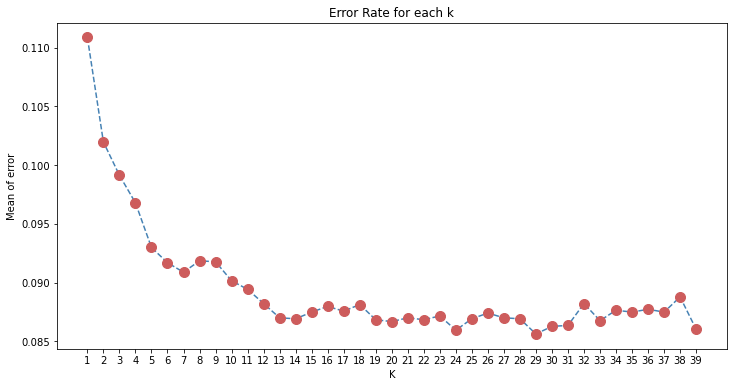

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="steelblue", linestyle="dashed", marker="o", markersize=10, mec="indianred", mfc="indianred")
plt.title("Error Rate for each k")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of error")

In [22]:
# define kNN model
knn = KNeighborsClassifier(n_neighbors=29)

# train kNN -> store data and label
knn.fit(x_train, y_train)

# predict
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

# classification report
print("Training performance:",
     classification_report(y_train, train_pred), sep="\n")

print("Testing performance:",
     classification_report(y_test, test_pred), sep="\n")

Training performance:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     25583
         yes       0.66      0.52      0.58      3248

    accuracy                           0.91     28831
   macro avg       0.80      0.74      0.77     28831
weighted avg       0.91      0.91      0.91     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     10965
         yes       0.66      0.50      0.57      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



# <font color="steelblue">05. Support Vector Machine

In [23]:
# Create x as features and y as target
x = bank_add_full.drop(["y", "y_label", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"], axis=1)
y = bank_add_full["y"]

RANDOM_STATE = 999

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

In [24]:
# Create a SVM classifier
clf = svm.SVC(kernel="linear")

# Train the model using the training sets
clf.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

In [25]:
# Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.95     10965
         yes       0.60      0.37      0.46      1392

    accuracy                           0.90     12357
   macro avg       0.76      0.67      0.70     12357
weighted avg       0.89      0.90      0.89     12357



# <font color="steelblue">06. Decision Tree

In [26]:
# Define feature column names
feat_cols = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "job_label", "mar_label", "edu_label", "def_label", "hou_label", "loan_label", "contact_label", "month_label", "day_label"]

In [27]:
# Set function for model
def train_model(x, y, model, test_size=.3):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=999
    )
    print(f"Training with {x_train.shape[0]} data.. Validating with {x_test.shape[0]}..")

    start = time()
    model.fit(x_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print("Training performance:")
    print(classification_report(y_train, train_pred))

    print("Testing performance:")
    print(classification_report(y_test, test_pred))

In [28]:
# Set function for tree graph
def visualize_tree(model, class_names):
    dot_data = StringIO()
    tree.export_graphviz(model, class_names=class_names, out_file=dot_data,
                         feature_names=feat_cols, filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

Training with 20181 data.. Validating with 8650..
Done training DecisionTreeClassifier in 0.081s
Training performance:
              precision    recall  f1-score   support

          no       0.95      0.96      0.95     17903
         yes       0.64      0.60      0.62      2278

    accuracy                           0.92     20181
   macro avg       0.80      0.78      0.79     20181
weighted avg       0.91      0.92      0.92     20181

Testing performance:
              precision    recall  f1-score   support

          no       0.95      0.95      0.95      7680
         yes       0.61      0.59      0.60       970

    accuracy                           0.91      8650
   macro avg       0.78      0.77      0.77      8650
weighted avg       0.91      0.91      0.91      8650



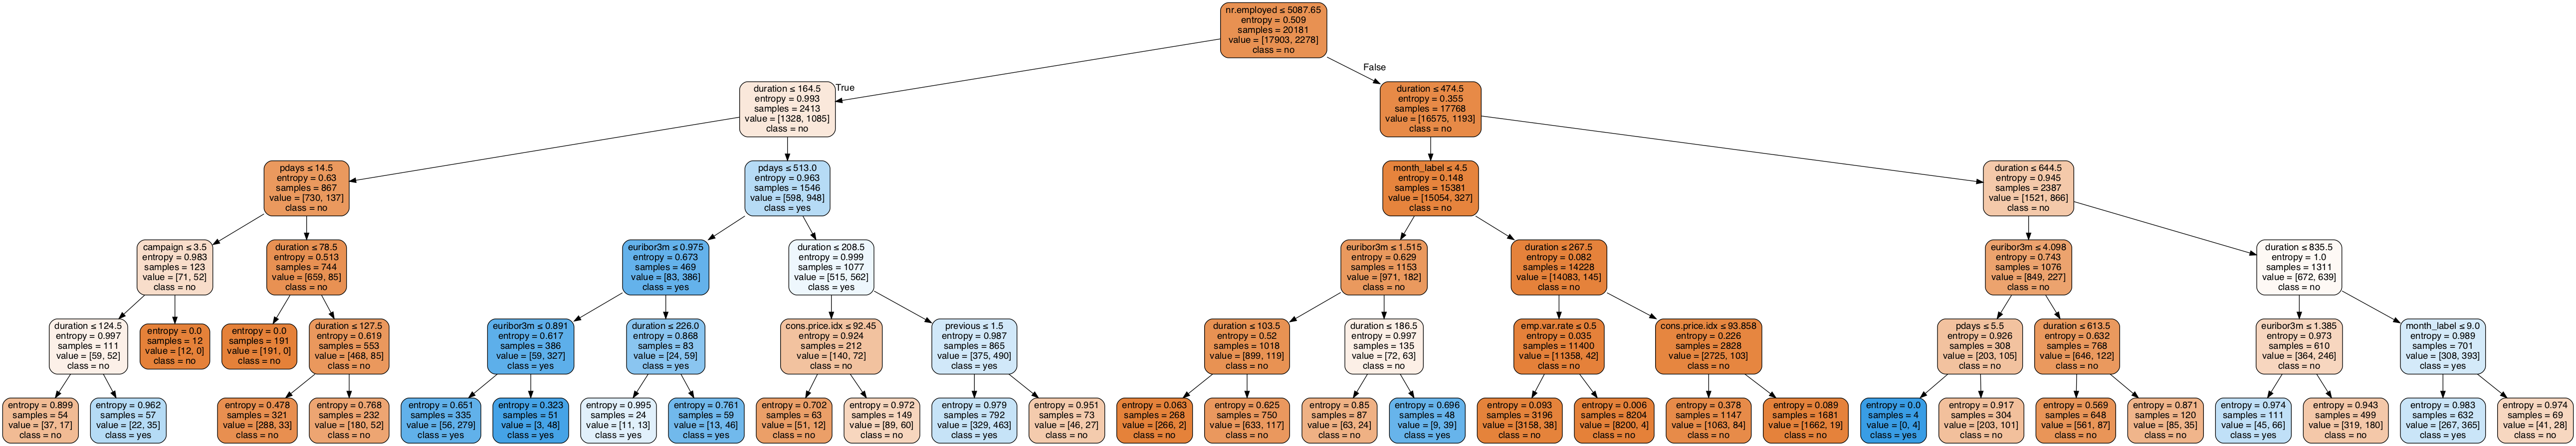

In [29]:
# Define Decision Tree model & performance
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
train_model(x_train, y_train, model)
graph = visualize_tree(model, ["no", "yes"])
Image(graph)

# <font color="steelblue">07. Naive Bayes

In [30]:
# Define Naive Bayes model
model = GaussianNB()
train_model(x_train, y_train, model)

Training with 20181 data.. Validating with 8650..
Done training GaussianNB in 0.057s
Training performance:
              precision    recall  f1-score   support

          no       0.95      0.90      0.92     17903
         yes       0.42      0.59      0.49      2278

    accuracy                           0.86     20181
   macro avg       0.68      0.74      0.71     20181
weighted avg       0.89      0.86      0.87     20181

Testing performance:
              precision    recall  f1-score   support

          no       0.95      0.90      0.92      7680
         yes       0.42      0.60      0.50       970

    accuracy                           0.86      8650
   macro avg       0.68      0.75      0.71      8650
weighted avg       0.89      0.86      0.87      8650



# <font color="steelblue">08. Comparing All Algorithms

In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 32537 to 38566
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   duration        28831 non-null  int64  
 2   campaign        28831 non-null  int64  
 3   pdays           28831 non-null  int64  
 4   previous        28831 non-null  int64  
 5   emp.var.rate    28831 non-null  float64
 6   cons.price.idx  28831 non-null  float64
 7   cons.conf.idx   28831 non-null  float64
 8   euribor3m       28831 non-null  float64
 9   nr.employed     28831 non-null  float64
 10  job_label       28831 non-null  int64  
 11  mar_label       28831 non-null  int64  
 12  edu_label       28831 non-null  int64  
 13  def_label       28831 non-null  int64  
 14  hou_label       28831 non-null  int64  
 15  loan_label      28831 non-null  int64  
 16  contact_label   28831 non-null  int64  
 17  month_label     28831 non-n

In [32]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier()
]

In [33]:
for model in models:
    print(f"=== Using {model.__class__.__name__} ===")
    train_model(x_train, y_train, model)

=== Using LogisticRegression ===
Training with 20181 data.. Validating with 8650..


/Users/septyaprilliandary/opt/anaconda3/envs/hacktiv8-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done training LogisticRegression in 0.248s
Training performance:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     17903
         yes       0.66      0.38      0.48      2278

    accuracy                           0.91     20181
   macro avg       0.79      0.68      0.71     20181
weighted avg       0.89      0.91      0.90     20181

Testing performance:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7680
         yes       0.65      0.39      0.49       970

    accuracy                           0.91      8650
   macro avg       0.79      0.68      0.72      8650
weighted avg       0.90      0.91      0.90      8650

=== Using DecisionTreeClassifier ===
Training with 20181 data.. Validating with 8650..
Done training DecisionTreeClassifier in 0.127s
Training performance:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     1

<font color="seagreen">**Notes:**
    
The best model is the one with Random Forest, because it has stable accuracy between training and testing, along with the high f1-score that points out that the model is robust enough to predict whether the client will subscribe to a time-deposit or not.

In [34]:
# See the feature importance of chosen model (Random Forest)
model = RandomForestClassifier()
train_model(x_train, y_train, model)

bank_feat_importance = pd.Series(model.feature_importances_, index=feat_cols).sort_values(ascending=False)
bank_feat_importance

Training with 20181 data.. Validating with 8650..
Done training RandomForestClassifier in 2.210s
Training performance:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     17903
         yes       1.00      1.00      1.00      2278

    accuracy                           1.00     20181
   macro avg       1.00      1.00      1.00     20181
weighted avg       1.00      1.00      1.00     20181

Testing performance:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7680
         yes       0.62      0.49      0.55       970

    accuracy                           0.91      8650
   macro avg       0.78      0.73      0.75      8650
weighted avg       0.90      0.91      0.90      8650



duration          0.317948
euribor3m         0.102748
age               0.090554
nr.employed       0.079940
pdays             0.049716
job_label         0.049096
edu_label         0.043874
campaign          0.041211
day_label         0.039486
cons.conf.idx     0.029269
mar_label         0.023362
cons.price.idx    0.021883
hou_label         0.020894
emp.var.rate      0.019543
previous          0.019234
month_label       0.018013
loan_label        0.014608
contact_label     0.009626
def_label         0.008994
dtype: float64

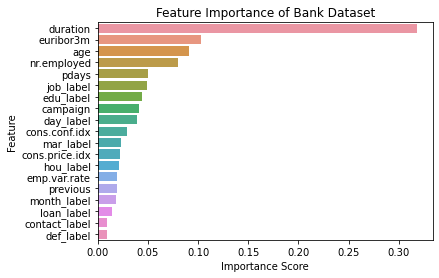

In [35]:
# Plot the feature importance
sns.barplot(x=bank_feat_importance, y=bank_feat_importance.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance of Bank Dataset")
plt.show()